# 2. Analise de correlação

---------------

## 2.1. Carregar os dados

-----------

In [1]:
pip install kagglehub[pandas-datasets]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
file_path = "Gym_Progress_Dataset.csv"  #importa csv direto do kaggle 

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "rishabhagarwal997889/gym-progress-tracking-dataset-200-days",
    file_path,
)

df.head()#carrega os 5 primeiros

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Admin\AppData\Local\Temp\ipykernel_11284\758623637.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,Day,Weight_kg,Calories_Intake,Protein_Intake_g,Workout_Duration_min,Steps_Walked
0,2025-01-01,71.5,3209,70,41,6820
1,2025-01-02,69.6,2584,150,40,4898
2,2025-01-03,71.9,2927,148,89,9546
3,2025-01-04,74.6,3216,85,20,2077
4,2025-01-05,69.3,2045,145,24,9577


## 2.2. Matriz de Correlação

---------

A matriz de correlação tem como objetivo verificar as relações lineares entre as variáveis.

Valores negativos (-1 a 0) indicam correlação negativa: quando uma variável aumenta, a outra tende a diminuir.

Valores positivos (0 a +1) indicam correlação positiva: quando uma variável aumenta, a outra tende a aumentar também.

Valores próximos de 0 indicam correlação fraca ou ausente entre as variáveis.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Weight_kg', 'Calories_Intake', 'Protein_Intake_g', 
                'Workout_Duration_min', 'Steps_Walked']#features numericas 
correlation_matrix = df[numeric_cols].corr() #calcula matriz de correlação para todas as features acima
print(correlation_matrix)

                      Weight_kg  Calories_Intake  Protein_Intake_g  \
Weight_kg              1.000000         0.024029          0.036743   
Calories_Intake        0.024029         1.000000          0.093012   
Protein_Intake_g       0.036743         0.093012          1.000000   
Workout_Duration_min   0.052531        -0.037467          0.078290   
Steps_Walked          -0.000087        -0.099471          0.020829   

                      Workout_Duration_min  Steps_Walked  
Weight_kg                         0.052531     -0.000087  
Calories_Intake                  -0.037467     -0.099471  
Protein_Intake_g                  0.078290      0.020829  
Workout_Duration_min              1.000000      0.138032  
Steps_Walked                      0.138032      1.000000  


- Para visualizar em Heatmap (mapa de calor) indicando cores vermelhas para relaçoes mais fortes e azul para mais fracas:

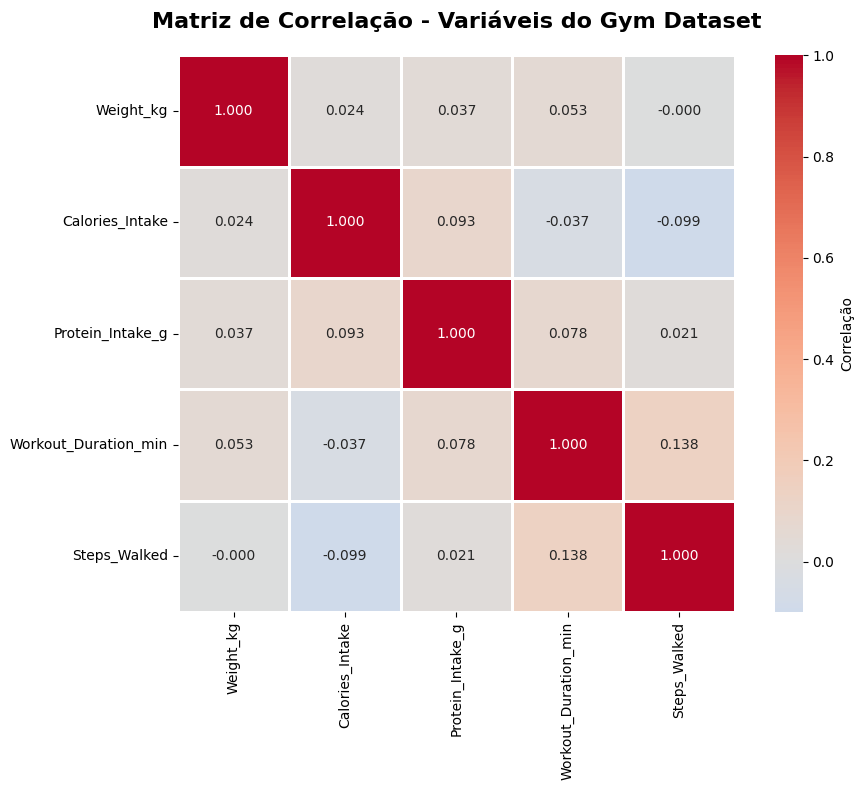

In [11]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, #modelo 
            annot=True,#mostra os valores
            cmap='coolwarm',#esquema de cores (azul/vermelho)
            center=0,# Centro em 0
            fmt='.3f',#Formato com 3 casas decimais
            square=True, #Células quadradas
            linewidths=1,#Linha entre células
            cbar_kws={'label': 'Correlação'}) #titulos para eixo x e eixo y

plt.title('Matriz de Correlação - Variáveis do Gym Dataset',  #titulo
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Todas as correlações são extremamente fracas (< 0.14), indicando que as variáveis são praticamente independentes entre si. Weight_kg apresenta correlação quase zero com todas as features (calorias, proteína, treino, passos), sugerindo que não é influenciado linearmente por esses fatores. A correlação mais forte encontrada é Workout_Duration vs Steps_Walked (0.138), que ainda é muito fraca e indica relação linear mínima entre quaisquer variáveis do dataset.

As correlações levam a crer que os dados são sintéticos, conforme informado pelo autor do dataset. Em dados reais de fitness, esperaríamos correlações significativas entre peso e consumo calórico, assim como entre atividade física e mudanças corporais. A ausência dessas relações lógicas confirma que as variáveis foram geradas de forma independente e aleatória, sem considerar as relações causais naturais presentes em cenários reais de treino e nutrição.

- A próxima missão é descobrir qual fator mais influenciam a perda e ganho de peso.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Correlação de todas as variáveis com o peso
weight_correlation = df[numeric_cols].corr()['Weight_kg'].sort_values(ascending=False) 
print("CORRELAÇÃO COM PESO (Weight_kg)") 
print(weight_correlation)# mostra somente as correlações do peso com outras variáveis.
print("\n")

CORRELAÇÃO COM PESO (Weight_kg)
Weight_kg               1.000000
Workout_Duration_min    0.052531
Protein_Intake_g        0.036743
Calories_Intake         0.024029
Steps_Walked           -0.000087
Name: Weight_kg, dtype: float64




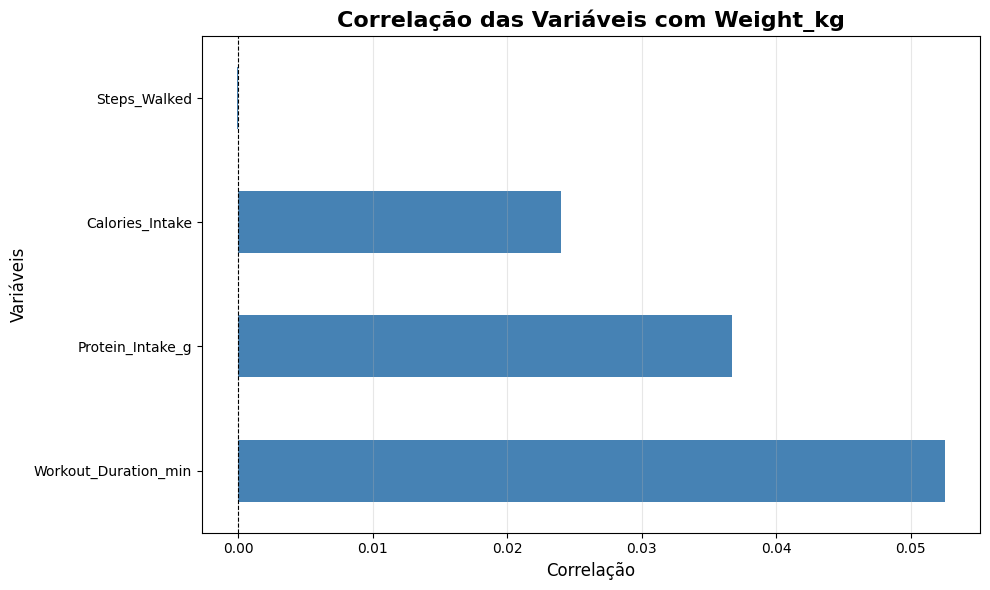

In [16]:
#Visualizar em barras das correlaçoes de peso
plt.figure(figsize=(10, 6))
weight_Filtered = weight_correlation.drop('Weight_kg')  #tira a analise de peso por peso (vai dar 1, pois sao as mesmas variaveis)
weight_Filtered.plot(kind='barh', color='steelblue')#plota em grafico de barras
plt.title('Correlação das Variáveis com Weight_kg', fontsize=16, fontweight='bold')
plt.xlabel('Correlação', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

- Vemos quase nenhuma relação entre as variáveis com o aumento ou diminuição de peso.

- A próxima análise deve ser feita apartir do scatter plott (Visualiza a relação entre DUAS variáveis numéricas). Se os pontos formam uma linha diagonal = correlação forte


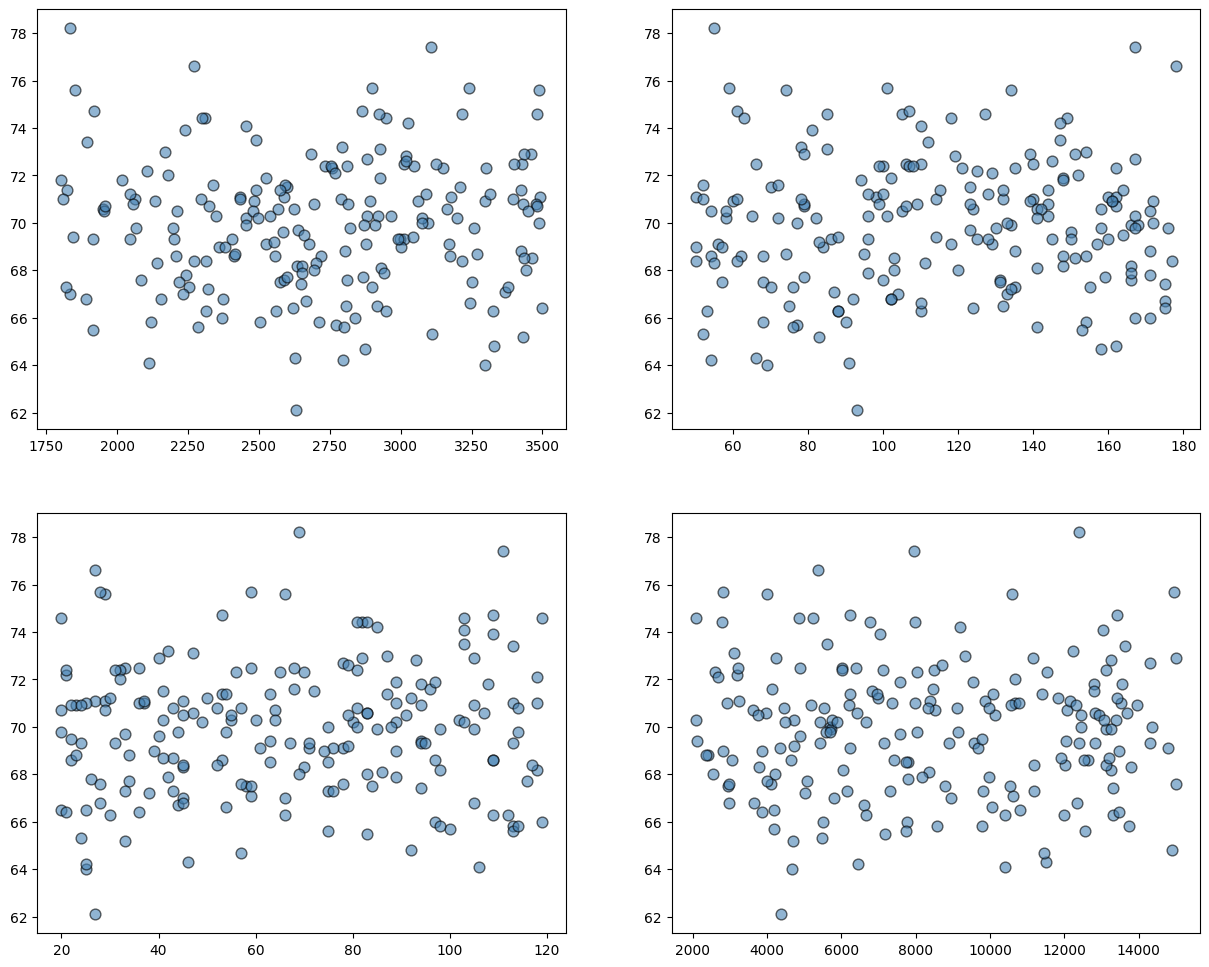

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['Calories_Intake', 'Protein_Intake_g', 'Workout_Duration_min', 'Steps_Walked']#features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].scatter(df[feature], df['Weight_kg'], #Aplcia o scatter plot entere as variaveis em função do peso
                     alpha=0.6,  
                     color='steelblue', 
                     edgecolors='black', 
                     s=60)

- vemos dados totalmente separados, sem nenhuma relação clara. para confirmar vamos traçar uma linha de regreção.

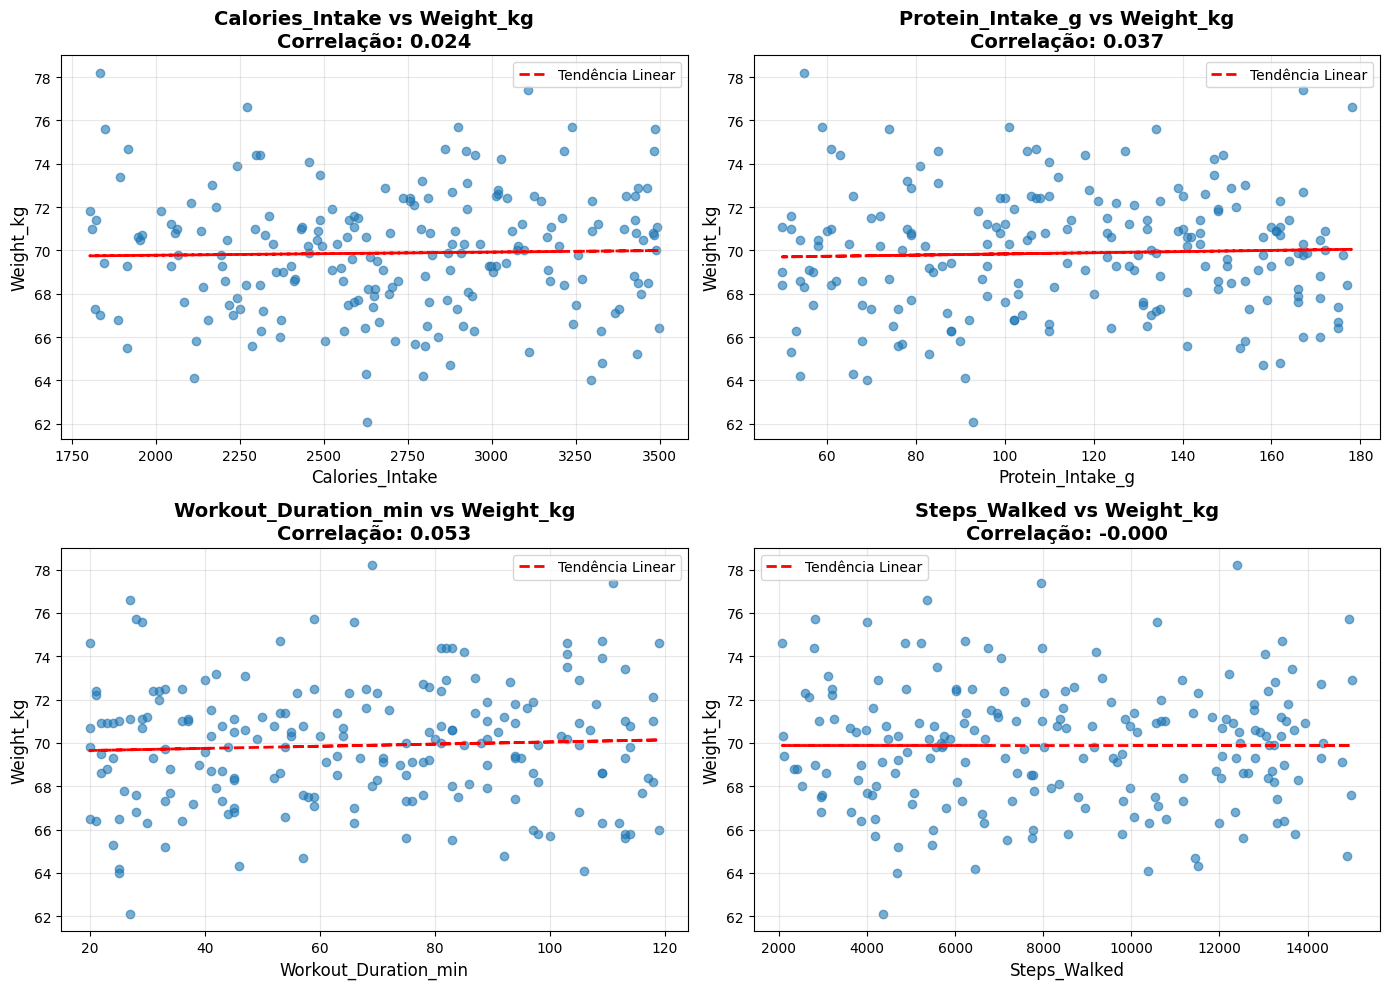

In [29]:
features = ['Calories_Intake', 'Protein_Intake_g', 'Workout_Duration_min', 'Steps_Walked']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() 
for idx, feature in enumerate(features):
    axes[idx].scatter(df[feature], df['Weight_kg'], alpha=0.6)#Scatter plot
    # Linha de tendência (regressão linear)
    z = np.polyfit(df[feature], df['Weight_kg'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), 
                   color='red', 
                   linestyle='--', 
                   linewidth=2, 
                   label='Tendência Linear')
    
    corr = df[feature].corr(df['Weight_kg'])
    axes[idx].set_title(f'{feature} vs Weight_kg\nCorrelação: {corr:.3f}', 
                       fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=12)
    axes[idx].set_ylabel('Weight_kg', fontsize=12)
    axes[idx].legend(loc='best')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- Mais uma vez, o grafico não apresenta relação clara entre as variaveis.